Author: James MacPhee  
Date: October 15th, 2019  
CSCI4155 Assignment 2

Question #1:
    a) K-fold cross validation is when you split the dataset into K number of 'folds' and you iterate through each one using it as the hold-out set for testing while using the other K-1 'folds' for training your model. It is used to gain better accuracy in your model by helping to eliminate bias and variance as the moidel gets to train on all subsets of the data and test on all those subsets as well.

In [11]:
#b)
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


#My method of using no cross-validation libraries
iris_data = np.loadtxt('iris.data',delimiter=',')
np.random.shuffle(iris_data)
x = iris_data[:,0:4]
y = iris_data[:,4]
n = len(iris_data)

total_accuracy_score = 0

k = 10
xFolds = np.array(np.array_split(x, k))
yFolds = np.array(np.array_split(y, k))

model = SVC(kernel='linear')

for i in range(k):
    x_test = xFolds[i]
    y_test = yFolds[i]
    x_train = np.delete(xFolds, i, 0)
    y_train = np.delete(yFolds, i, 0)
    x_train = np.reshape(x_train, (-1, 4))
    y_train = np.reshape(y_train, 135)
    
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    total_accuracy_score += np.mean(y_test == y_predicted)

print("Average Accuracy Score: ", total_accuracy_score/10)



#Given method in class
scores = cross_val_score(SVC(kernel='linear'), x, y, cv=k)
print("Accuracy on iris data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Average Accuracy Score:  0.9733333333333334
Accuracy on iris data: 0.9867 (+/- 0.0267)


The results are very similar, everytime I ran it my results were within the standard deviation of the sklearn results.

In [12]:
#c)
from sklearn.ensemble import RandomForestClassifier as RFC

#SVM
svm = SVC(kernel='linear')
svm_scores = cross_val_score(svm, x, y, cv=k)
print("Accuracy on iris data with SVM classifier: %0.4f (+/- %0.4f)" % (svm_scores.mean(), svm_scores.std()))

#RF
rf = RFC(n_estimators=10)
rf_scores = cross_val_score(rf, x, y, cv=k)
print("Accuracy on iris data with RF classifier:  %0.4f (+/- %0.4f)" % (rf_scores.mean(), rf_scores.std()))

Accuracy on iris data with SVM classifier: 0.9867 (+/- 0.0267)
Accuracy on iris data with RF classifier:  0.9600 (+/- 0.0533)


I chose ton use the built in sklearn CV modules to compare SVM and RF accuracy scores for obvious simplicity. 
The results were quite similar with the SVM being slightly more accurate every run which is most likely because the iris dataset is quite small as well with a small number of classes, where the RFC usually performs better on very large datasets with many classes.

In [13]:
#Question 2:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Importing data
wine_train = np.loadtxt('wine.train', delimiter=',')
wine_test = np.loadtxt('wine.test', delimiter=',')

y_train = wine_train[:, 0]
x_train = wine_train[:, 1:13]
x_test = wine_test[:, 1:13]
k = 40

#Making models
rfc_model = RFC(n_estimators=100)

#Using simple leave-one-out CV accuracy score for best results
rfc_model_scores = cross_val_score(rfc_model, x_train, y_train, cv=k)
print("Accuracy on wine data with RF classifier:  %0.4f (+/- %0.4f)" % (rfc_model_scores.mean(), rfc_model_scores.std()))

#Fitting models using leave-one-out cross validation
#and tuning parameters using GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50],
    'min_samples_split': [2, 4, 8],
    'max_features': ['sqrt', 'log2', 'auto']
}

grid = GridSearchCV(rfc_model, param_grid = param_grid, cv = k, verbose = 0, n_jobs = -1)
grid.fit(x_train, y_train)
y_pred = grid.best_estimator_.predict(x_test)

#Saving results into csv file
np.savetxt('results.csv', y_pred, delimiter=',')

Accuracy on wine data with RF classifier:  0.9667 (+/- 0.1000)


Question #2 Description:

The reason I chose to use a random forest classifier perceptron classifier is because perceptron tend to perform worse on smaller datasets like this one, and I didn't chose a support vector classifier because this dataset has a high number of features compared to it's lower number of data points (I read that RF does better than SVM in these cases somewhere but that could be entirely wrong).

At first I gained a simple accuracy score on the training data itself and then used GridSearchCV to gain my actual predictions for the classes of the wines. I did this because which run through of my program received the highest accuracy (it was 100%, but obviously the test data will yield different, but hopefully not by much, results) would be the run I chose to save in 'best_result.csv'. I saved all other results in 'results.csv' just to show how thr program works (and that it does actually work).
Therefore the csv file I will be submitting with my assignment to be graded is 'best_result.csv'.

In [130]:
#Question 3:
#Setup of data
mnist = pd.read_csv('mnist_784.csv')
print(mnist)
Y = mnist['class'].values
Y = np.eye(10)[Y.astype('int')]
Y = Y.T
X = mnist.drop(columns='class').values
X = X.astype(float)/255
X = X.T
print(X.shape)
print(Y.shape)

# model specifications
Ni=784; Nh=4; No=10;

#parameter and array initialization
Ntrials=100
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern
    print(Y)
    print(y)

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.999999*dwo+do@h.T
    wo=wo+0.000001*dwo
    dwh=0.999999*dwh+dh@X.T
    wh=wh+0.000001*dwh
    
    error=np.append(error,np.sum(abs(Y-y))/70000)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.4085463  0.3771282  0.47934609 ... 0.46322488 0.45199407 0.41755191]
 [0.33576801 0.26473201 0.41480367 ... 0.37828167 0.36829007 0.29379689]
 [0.68183332 0.85953773 0.74539651 ... 0.72889877 0.69441966 0.84434178]
 ...
 [0.63066471 0.8880757  0.85587858 ... 0.66377849 0.69104757 0.91471339]
 [0.15862967 0.13884377 0.39636302 ... 0.1648895  0.15428116 0.12883369]
 [0.31989519 0.46282073 0.62554768 ... 0.31171343 0.32127471 0.46401703]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.38173773 0.34375225 0.4615082  ... 0.43303992 0.42379232 0.38156125]
 [0.31765992 0.24341938 0.3990685  ... 0.35759943 0.34969549 0.27015314]
 [0.66307191 0.84444165 0.73949655 ... 0.70264013 0.66833379 0.82676917]
 ...
 [0.60718651 0.87433

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.10206576 0.05774175 0.13126936 ... 0.10325933 0.10327194 0.10265978]
 [0.119408   0.05543744 0.12014188 ... 0.12063806 0.12061832 0.11986833]
 [0.17095684 0.20638354 0.51031795 ... 0.16091493 0.16030708 0.16351488]
 ...
 [0.21127998 0.3925864  0.42952321 ... 0.21972977 0.22021315 0.21755803]
 [0.10876372 0.07853346 0.22670516 ... 0.10575397 0.10560228 0.10659192]
 [0.06786193 0.04944776 0.18768155 ... 0.06507083 0.06507432 0.06635338]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.08938621 0.04852498 0.10836517 ... 0.08995745 0.08996622 0.08969093]
 [0.108364   0.04806393 0.10141859 ... 0.10897928 0.10897457 0.10859401]
 [0.13896685 0.15915383 0.4676214  ... 0.13174242 0.13146335 0.1337049 ]
 ...
 [0.18333924 0.33605

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.01348533 0.01325266 0.01079355 ... 0.01347752 0.01347588 0.01348083]
 [0.02706845 0.02649133 0.01692079 ... 0.0270553  0.02705584 0.02705982]
 [0.00676147 0.00667989 0.0302685  ... 0.00674827 0.00675049 0.00675226]
 ...
 [0.01789493 0.01786518 0.01865562 ... 0.01789156 0.0178844  0.01789505]
 [0.06555648 0.06501737 0.08203516 ... 0.06552015 0.06552524 0.06553147]
 [0.0093632  0.00917106 0.01093281 ... 0.00935189 0.00934971 0.00935662]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.01161201 0.01151722 0.00994682 ... 0.01160669 0.01160542 0.01160895]
 [0.02426785 0.02402369 0.016526   ... 0.02425852 0.02425889 0.02426175]
 [0.00533075 0.00529806 0.02388441 ... 0.00532296 0.00532439 0.00532534]
 ...
 [0.01476169 0.01474

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00165124 0.00165123 0.00298438 ... 0.00165122 0.00165119 0.00165123]
 [0.00588082 0.00588079 0.01013024 ... 0.00588074 0.00588074 0.00588077]
 [0.00024262 0.00024262 0.00112475 ... 0.00024262 0.00024262 0.00024262]
 ...
 [0.00118519 0.00118518 0.00174265 ... 0.00118517 0.00118514 0.00118518]
 [0.04084074 0.04084058 0.05852897 ... 0.04084039 0.04084043 0.04084052]
 [0.00130376 0.00130374 0.00294103 ... 0.00130373 0.00130371 0.00130374]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00142092 0.00142091 0.00256083 ... 0.0014209  0.00142088 0.00142091]
 [0.00527452 0.00527449 0.00908148 ... 0.00527447 0.00527446 0.00527449]
 [0.00019132 0.00019132 0.0008477  ... 0.00019132 0.00019132 0.00019132]
 ...
 [0.00097564 0.00097

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[2.72111136e-04 2.72110990e-04 4.18769713e-04 ... 2.72110980e-04
  2.72110509e-04 2.72111056e-04]
 [1.59553793e-03 1.59553744e-03 2.38053830e-03 ... 1.59553714e-03
  1.59553684e-03 1.59553749e-03]
 [1.40306574e-05 1.40306489e-05 3.54827619e-05 ... 1.40306418e-05
  1.40306466e-05 1.40306485e-05]
 ...
 [1.14675716e-04 1.14675643e-04 1.62925840e-04 ... 1.14675657e-04
  1.14675331e-04 1.14675688e-04]
 [2.81324976e-02 2.81324928e-02 3.43764836e-02 ... 2.81324906e-02
  2.81324845e-02 2.81324937e-02]
 [2.40523708e-04 2.40523566e-04 4.03549466e-04 ... 2.40523545e-04
  2.40523137e-04 2.40523623e-04]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[2.34143547e-04 2.34143447e-04 3.53966807e-04 ... 2.34143446e-04
  2.34143111e-04 2.341

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[5.20979486e-05 5.20979461e-05 6.70187176e-05 ... 5.20979472e-05
  5.20979368e-05 5.20979479e-05]
 [4.83176245e-04 4.83176236e-04 6.09876186e-04 ... 4.83176234e-04
  4.83176220e-04 4.83176239e-04]
 [1.02921029e-06 1.02921026e-06 1.69040409e-06 ... 1.02921025e-06
  1.02921023e-06 1.02921027e-06]
 ...
 [1.34732056e-05 1.34732048e-05 1.68753605e-05 ... 1.34732053e-05
  1.34732014e-05 1.34732055e-05]
 [2.05604708e-02 2.05604706e-02 2.27052880e-02 ... 2.05604706e-02
  2.05604697e-02 2.05604707e-02]
 [5.10811424e-05 5.10811401e-05 6.76490940e-05 ... 5.10811410e-05
  5.10811319e-05 5.10811417e-05]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[4.48284233e-05 4.48284216e-05 5.68915141e-05 ... 4.48284224e-05
  4.48284151e-05 4.482

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[9.97425946e-06 9.97425942e-06 1.13804817e-05 ... 9.97425945e-06
  9.97425924e-06 9.97425946e-06]
 [1.46368013e-04 1.46368012e-04 1.65290296e-04 ... 1.46368012e-04
  1.46368012e-04 1.46368012e-04]
 [7.55014984e-08 7.55014982e-08 9.64499183e-08 ... 7.55014983e-08
  7.55014978e-08 7.55014984e-08]
 ...
 [1.58291623e-06 1.58291622e-06 1.79276111e-06 ... 1.58291623e-06
  1.58291618e-06 1.58291623e-06]
 [1.53831728e-02 1.53831728e-02 1.61011557e-02 ... 1.53831728e-02
  1.53831727e-02 1.53831728e-02]
 [1.08483531e-05 1.08483530e-05 1.24794102e-05 ... 1.08483531e-05
  1.08483529e-05 1.08483531e-05]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[8.58249328e-06 8.58249325e-06 9.71480739e-06 ... 8.58249327e-06
  8.58249312e-06 8.582

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.90960799e-06 1.90960799e-06 2.03790779e-06 ... 1.90960799e-06
  1.90960799e-06 1.90960799e-06]
 [4.43436337e-05 4.43436337e-05 4.70764039e-05 ... 4.43436337e-05
  4.43436337e-05 4.43436337e-05]
 [5.53886716e-09 5.53886715e-09 6.21807302e-09 ... 5.53886716e-09
  5.53886715e-09 5.53886716e-09]
 ...
 [1.85974085e-07 1.85974085e-07 1.98185968e-07 ... 1.85974085e-07
  1.85974085e-07 1.85974085e-07]
 [1.17357805e-02 1.17357805e-02 1.19751183e-02 ... 1.17357805e-02
  1.17357805e-02 1.17357805e-02]
 [2.30394813e-06 2.30394813e-06 2.46279705e-06 ... 2.30394813e-06
  2.30394812e-06 2.30394813e-06]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.64315149e-06 1.64315149e-06 1.74624820e-06 ... 1.64315149e-06
  1.64315149e-06 1.643

In [143]:
#Question 3:
#Setup of data
mnist = pd.read_csv('mnist_784.csv')
Y = mnist['class'].values
Y = np.eye(10)[Y.astype('int')]
Y = Y.T
X = mnist.drop(columns='class').values
X = X.astype(float)/255
X = X.T

# model specifications
Ni=784; Nh=15; No=10;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.999999*dwo+do@h.T
    wo=wo+0.000001*dwo
    dwh=0.999999*dwh+dh@X.T
    wh=wh+0.000001*dwh
    
    error=np.append(error,np.sum(abs(Y-y))/70000)

C:\Users\james\Anaconda3\envs\james\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


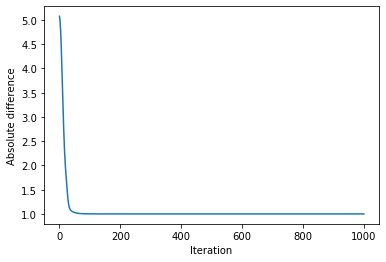

In [144]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()

In [191]:
#Question 4:
import pandas as pd
df = pd.read_csv('houses.csv')
print(df.describe())
y = df['price (grands)']
X = df.drop(columns='price (grands)')
X_1 = pd.DataFrame(df['sqft_living'])

       price (grands)      bedrooms     bathrooms   sqft_living      sqft_lot  \
count    21613.000000  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean       540.088142      3.370842      2.114757   2079.899736  1.510697e+04   
std        367.127196      0.930062      0.770163    918.440897  4.142051e+04   
min         75.000000      0.000000      0.000000    290.000000  5.200000e+02   
25%        321.950000      3.000000      1.750000   1427.000000  5.040000e+03   
50%        450.000000      3.000000      2.250000   1910.000000  7.618000e+03   
75%        645.000000      4.000000      2.500000   2550.000000  1.068800e+04   
max       7700.000000     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517

A Pandas DataFrame is a 2-dimensional, labeled data, size-mutable, tablular data structure. It can contain many different data types within its columns. It is quite similar do a dynamic spreadsheet. 

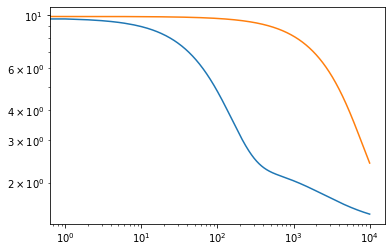

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_2 = X_1.values
X2 = X.values
X_2 = scaler.fit_transform(X_2)
X2 = scaler.fit_transform(X2)
X_1 = pd.DataFrame(X_2)
X = pd.DataFrame(X2)


def linear_regression(X, y, lr=0.005, reps=10000):
    params = np.ones(X.shape[1])
    loss = np.zeros(reps)
    m = len(y)
    for i in range(reps):
        gradient = X.T.dot(X.dot(params) - y)/m
        params = params - gradient*lr
        loss[i] = np.sum((abs(X.dot(params) - y))**2)/(2*m)
 
    return params, loss

params1, loss1 = linear_regression(X, y)
params2, loss2 = linear_regression(X_1, y)

plt.loglog(range(10000), loss1/len(y))
plt.loglog(range(10000), loss2/len(y))